In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Outlier _analysis/network_data.csv')
data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port
0,192.168.1.39,10.0.0.5,1017.317957,66.459178,2.500291e+05,21
1,192.168.1.29,10.0.0.4,968.864553,73.743095,1.664690e+05,8080
2,192.168.1.15,10.0.0.1,1233.556412,54.015064,2.696233e+05,21
3,192.168.1.43,10.0.0.5,1050.884169,42.590181,1.874977e+05,22
4,192.168.1.8,10.0.0.2,1067.520532,52.908736,2.144347e+05,80
...,...,...,...,...,...,...
495,192.168.1.5,10.0.0.3,1176.731987,75.579688,1.803994e+05,22
496,192.168.1.12,10.0.0.1,1130.464576,58.138777,2.529968e+05,80
497,192.168.1.16,10.0.0.2,684.721569,52.313137,2.308503e+05,22
498,192.168.1.26,10.0.0.4,1295.308070,58.253621,2.341785e+05,12345


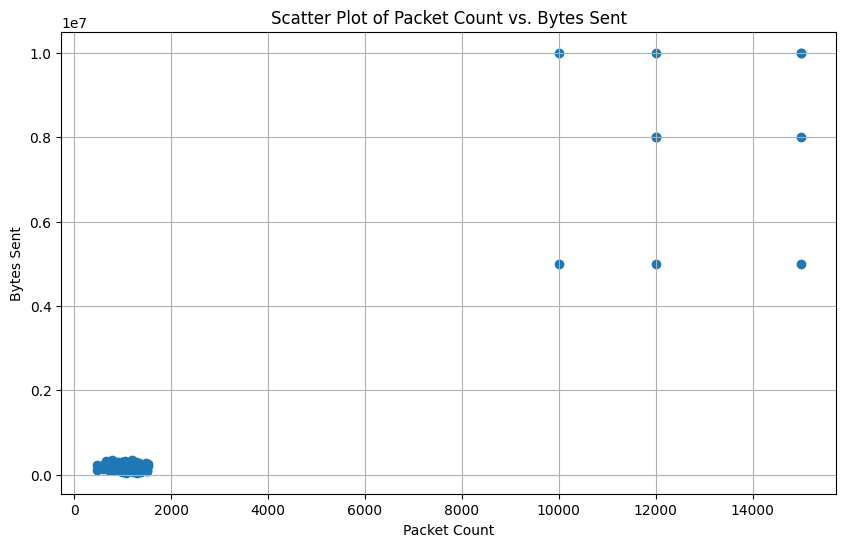

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Packet_Count'], data['Bytes_Sent'])
plt.xlabel('Packet Count')
plt.ylabel('Bytes Sent')
plt.title('Scatter Plot of Packet Count vs. Bytes Sent')
plt.grid(True)
plt.show()

In [5]:
numerical_features = ['Packet_Count', 'Session_Duration', 'Bytes_Sent']

In [6]:
for feature in numerical_features:
    data[f'{feature}_ZScore'] = np.abs((data[feature] - data[feature].mean()) / data[feature].std())

data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore
0,192.168.1.39,10.0.0.5,1017.317957,66.459178,2.500291e+05,21,0.139424,0.082357,0.093653
1,192.168.1.29,10.0.0.4,968.864553,73.743095,1.664690e+05,8080,0.168179,0.021282,0.168318
2,192.168.1.15,10.0.0.1,1233.556412,54.015064,2.696233e+05,21,0.011098,0.186698,0.076145
3,192.168.1.43,10.0.0.5,1050.884169,42.590181,1.874977e+05,22,0.119504,0.282494,0.149528
4,192.168.1.8,10.0.0.2,1067.520532,52.908736,2.144347e+05,80,0.109632,0.195975,0.125459
...,...,...,...,...,...,...,...,...,...
495,192.168.1.5,10.0.0.3,1176.731987,75.579688,1.803994e+05,22,0.044820,0.005883,0.155871
496,192.168.1.12,10.0.0.1,1130.464576,58.138777,2.529968e+05,80,0.072277,0.152122,0.091002
497,192.168.1.16,10.0.0.2,684.721569,52.313137,2.308503e+05,22,0.336804,0.200969,0.110790
498,192.168.1.26,10.0.0.4,1295.308070,58.253621,2.341785e+05,12345,0.025549,0.151159,0.107817


In [11]:
for feature in numerical_features:
  data[f'{feature}_Outlier_Z'] = (data[f'{feature}_ZScore'].abs() > 3)
data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore,Packet_Count_Outlier_Z,Session_Duration_Outlier_Z,Bytes_Sent_Outlier_Z
0,192.168.1.39,10.0.0.5,1017.317957,66.459178,2.500291e+05,21,0.139424,0.082357,0.093653,False,False,False
1,192.168.1.29,10.0.0.4,968.864553,73.743095,1.664690e+05,8080,0.168179,0.021282,0.168318,False,False,False
2,192.168.1.15,10.0.0.1,1233.556412,54.015064,2.696233e+05,21,0.011098,0.186698,0.076145,False,False,False
3,192.168.1.43,10.0.0.5,1050.884169,42.590181,1.874977e+05,22,0.119504,0.282494,0.149528,False,False,False
4,192.168.1.8,10.0.0.2,1067.520532,52.908736,2.144347e+05,80,0.109632,0.195975,0.125459,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,192.168.1.5,10.0.0.3,1176.731987,75.579688,1.803994e+05,22,0.044820,0.005883,0.155871,False,False,False
496,192.168.1.12,10.0.0.1,1130.464576,58.138777,2.529968e+05,80,0.072277,0.152122,0.091002,False,False,False
497,192.168.1.16,10.0.0.2,684.721569,52.313137,2.308503e+05,22,0.336804,0.200969,0.110790,False,False,False
498,192.168.1.26,10.0.0.4,1295.308070,58.253621,2.341785e+05,12345,0.025549,0.151159,0.107817,False,False,False


In [12]:
outlier_data = data[
    (data['Packet_Count_Outlier_Z']) &
    (data['Session_Duration_Outlier_Z']) &
    (data['Bytes_Sent_Outlier_Z'])
]

outlier_data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore,Packet_Count_Outlier_Z,Session_Duration_Outlier_Z,Bytes_Sent_Outlier_Z
28,192.168.1.25,10.0.0.1,10000.0,600.0,10000000.0,12345,5.191347,4.391289,8.618408,True,True,True
33,192.168.1.16,10.0.0.4,15000.0,900.0,8000000.0,22,8.158597,6.906736,6.831313,True,True,True
82,192.168.1.23,10.0.0.5,12000.0,1200.0,10000000.0,21,6.378247,9.422183,8.618408,True,True,True
181,192.168.1.28,10.0.0.2,10000.0,1200.0,5000000.0,12345,5.191347,9.422183,4.150671,True,True,True
247,192.168.1.29,10.0.0.3,12000.0,600.0,5000000.0,22,6.378247,4.391289,4.150671,True,True,True
343,192.168.1.21,10.0.0.3,15000.0,600.0,10000000.0,443,8.158597,4.391289,8.618408,True,True,True
362,192.168.1.35,10.0.0.2,15000.0,900.0,10000000.0,443,8.158597,6.906736,8.618408,True,True,True
462,192.168.1.26,10.0.0.1,15000.0,600.0,5000000.0,22,8.158597,4.391289,4.150671,True,True,True
466,192.168.1.1,10.0.0.5,12000.0,1200.0,8000000.0,21,6.378247,9.422183,6.831313,True,True,True
499,192.168.1.26,10.0.0.3,12000.0,900.0,8000000.0,8080,6.378247,6.906736,6.831313,True,True,True


In [13]:
for feature in numerical_features:
  Q1 = data['Packet_Count'].quantile(0.25)
  Q3 = data['Packet_Count'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[f'{feature}_Outlier_IQR'] = (data[feature] < lower_bound) | (data[feature] > upper_bound)

data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore,Packet_Count_Outlier_Z,Session_Duration_Outlier_Z,Bytes_Sent_Outlier_Z,Packet_Count_Outlier_IQR,Session_Duration_Outlier_IQR,Bytes_Sent_Outlier_IQR
0,192.168.1.39,10.0.0.5,1017.317957,66.459178,2.500291e+05,21,0.139424,0.082357,0.093653,False,False,False,False,True,True
1,192.168.1.29,10.0.0.4,968.864553,73.743095,1.664690e+05,8080,0.168179,0.021282,0.168318,False,False,False,False,True,True
2,192.168.1.15,10.0.0.1,1233.556412,54.015064,2.696233e+05,21,0.011098,0.186698,0.076145,False,False,False,False,True,True
3,192.168.1.43,10.0.0.5,1050.884169,42.590181,1.874977e+05,22,0.119504,0.282494,0.149528,False,False,False,False,True,True
4,192.168.1.8,10.0.0.2,1067.520532,52.908736,2.144347e+05,80,0.109632,0.195975,0.125459,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,192.168.1.5,10.0.0.3,1176.731987,75.579688,1.803994e+05,22,0.044820,0.005883,0.155871,False,False,False,False,True,True
496,192.168.1.12,10.0.0.1,1130.464576,58.138777,2.529968e+05,80,0.072277,0.152122,0.091002,False,False,False,False,True,True
497,192.168.1.16,10.0.0.2,684.721569,52.313137,2.308503e+05,22,0.336804,0.200969,0.110790,False,False,False,False,True,True
498,192.168.1.26,10.0.0.4,1295.308070,58.253621,2.341785e+05,12345,0.025549,0.151159,0.107817,False,False,False,False,True,True


In [14]:
outlier_data_IQR = data[
    (data['Packet_Count_Outlier_IQR']) &
    (data['Session_Duration_Outlier_IQR']) &
    (data['Bytes_Sent_Outlier_IQR'])
]

outlier_data_IQR

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore,Packet_Count_Outlier_Z,Session_Duration_Outlier_Z,Bytes_Sent_Outlier_Z,Packet_Count_Outlier_IQR,Session_Duration_Outlier_IQR,Bytes_Sent_Outlier_IQR
96,192.168.1.45,10.0.0.5,460.622671,62.299544,111348.376590,12345,0.469795,0.117234,0.217571,False,False,False,True,True,True
118,192.168.1.9,10.0.0.2,469.806038,51.715372,232795.038826,443,0.464345,0.205981,0.109053,False,False,False,True,True,True


In [15]:
outlier_data = data[
    (data['Packet_Count_Outlier_Z']) &
    (data['Session_Duration_Outlier_Z']) &
    (data['Bytes_Sent_Outlier_Z']) &
    (data['Packet_Count_Outlier_IQR']) &
    (data['Session_Duration_Outlier_IQR']) &
    (data['Bytes_Sent_Outlier_IQR'])
]

outlier_data

,Source_IP,Destination_IP,Packet_Count,Session_Duration,Bytes_Sent,Destination_Port,Packet_Count_ZScore,Session_Duration_ZScore,Bytes_Sent_ZScore,Packet_Count_Outlier_Z,Session_Duration_Outlier_Z,Bytes_Sent_Outlier_Z,Packet_Count_Outlier_IQR,Session_Duration_Outlier_IQR,Bytes_Sent_Outlier_IQR
